# **Import setting**

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm, metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')



In [70]:
# Matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = 'c://Windows//Fonts//malgun.ttf' # 폰트 파일 위치
font_name = font_manager.FontProperties( fname = font_path ).get_name()
rc( 'font', family = font_name )
plt.rcParams['font.size'] = 15

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

---------------------------------------------------------------------------

# **제주 신용카드 빅데이터 경진대회 -  공공데이터 AI 활용 카드 사용량 예측**


## 배경
- 신용카드 사용량을 분석을 통한  ‘Post COVID-19 시대’ 신용카드 사용량 예측 모델 개발을 통해 **지역 경제 위축 및 중소상공인 경영난 해소를 위한 대책 마련**하고자 한다. 


## 목표 
- AI 알고리즘 활용 신용카드 사용 내역 데이터를 활용한 지역별, 업종별 월간 카드 사용 총액 예측


## 데이터 설명
1. 201901-202003.csv 
   : 카드이용지역, 업종, 거주지역 등 준식별자로 구성된 카드 사용 내역 (출처: BC카드),  2019.01 ~ 2020.03 기간 내 카드 데이터
2. 202004.csv
   : 2020.04 기간 내 카드 데이터
3. submission.csv
   : 제출 양식

## 변수 설명



*   제주 신용카드 빅데이터 경진대회/201901-202003.csv
1. REG_YYMM : 년월
2. CARD_SIDO_NM	: 카드이용지역_시도 (가맹점 주소 기준)
3. CARD_CCG_NM : 카드이용지역_시군구 (가맹점 주소 기준)
4. STD_CLSS_NM : 업종명
5. HOM_SIDO_NM : 거주지역_시도 (고객 집주소 기준)
6. HOM_CCG_NM : 거주지역_시군구 (고객 집주소 기준)
7. AGE : 연령대
8. SEX_CTGO_CD : 성별 (1: 남성, 2: 여성)
9. FLC : 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)
10. CSTMR_CNT : 이용고객수 (명)
11. AMT : 이용금액 (원)
12. CNT : 이용건수 (건)


*   submission.csv 파일
1. id : 구분자
2. REG_YYMM	: 년월
3. CARD_SIDO_NM : 카드이용지역_시도 (가맹점 주소 기준)
4. STD_CLSS_NM : 업종명
5. AMT : 이용금액 (원)


## **1. 데이터 읽기 및 전처리**

### 1-1 데이터 불러오기

In [ ]:
df1 = pd.read_csv('201901-202003.csv')
df2= pd.read_csv('202004.csv')
df1.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [ ]:
df2.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,202004,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,3,779600,4
1,202004,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,2,3,14,2427700,15
2,202004,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,1,4,18,2184600,18
3,202004,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,2,4,21,3653100,23
4,202004,강원,강릉시,건강보조식품 소매업,강원,강릉시,60s,1,5,15,2765500,18


In [ ]:
df1 = df1.append(df2,ignore_index=True)

In [ ]:
submission = pd.read_csv('/content/drive/My Drive/사우나/제주 신용카드 빅데이터 경진대회/submission.csv')
submission.head()

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,0,202004,강원,건강보조식품 소매업,0
1,1,202004,강원,골프장 운영업,0
2,2,202004,강원,과실 및 채소 소매업,0
3,3,202004,강원,관광 민예품 및 선물용품 소매업,0
4,4,202004,강원,그외 기타 분류안된 오락관련 서비스업,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048114 entries, 0 to 26048113
Data columns (total 12 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   REG_YYMM      int64 
 1   CARD_SIDO_NM  object
 2   CARD_CCG_NM   object
 3   STD_CLSS_NM   object
 4   HOM_SIDO_NM   object
 5   HOM_CCG_NM    object
 6   AGE           object
 7   SEX_CTGO_CD   int64 
 8   FLC           int64 
 9   CSTMR_CNT     int64 
 10  AMT           int64 
 11  CNT           int64 
dtypes: int64(6), object(6)
memory usage: 2.3+ GB


- 총 **12개의 변수**와 24697792 행으로 구성되어 있다. 
- 전체는 CARD_SIDO_NM(카드이용지역_시도) , CARD_CCG_NM(카드이용지역_시군구), STD_CLSS_NM (업종명),  HOM_SIDO_NM (거주지역_시도) , OM_CCG_NM 거주지역_시군구) , AGE(연령대)  **object 형태**인 것을 알 수 있다.


### 1-2 결측치 확인

In [ ]:
# 변수별 결측치 개수 확인
df1.isnull().sum()

REG_YYMM             0
CARD_SIDO_NM         0
CARD_CCG_NM      92371
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      155234
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

- **카드이용지역_ 시군구와 거주지역_ 시군구**에 해당하는 두 변수가 결측치가 다수 있는 것을 확인할 수 있다.


In [ ]:
isnull_CARD_CCG = df1[df1['CARD_CCG_NM'].isnull()==True]
isnull_CARD_CCG 

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
1243710,201901,세종,NaN,건강보조식품 소매업,세종,NaN,30s,1,2,14,2737050,17
1243711,201901,세종,NaN,건강보조식품 소매업,세종,NaN,30s,2,2,14,2595350,14
1243712,201901,세종,NaN,건강보조식품 소매업,세종,NaN,40s,1,3,13,2531950,11
1243713,201901,세종,NaN,건강보조식품 소매업,세종,NaN,40s,2,3,11,2118425,12
1243714,201901,세종,NaN,건강보조식품 소매업,세종,NaN,50s,1,4,21,3025500,23
...,...,...,...,...,...,...,...,...,...,...,...,...
25738641,202004,세종,NaN,화장품 및 방향제 소매업,충북,청주시 흥덕구,50s,1,4,4,150800,4
25738642,202004,세종,NaN,화장품 및 방향제 소매업,충북,청주시 흥덕구,50s,2,4,3,72800,4
25738643,202004,세종,NaN,화장품 및 방향제 소매업,충북,청주시 흥덕구,60s,1,5,4,75100,4
25738644,202004,세종,NaN,화장품 및 방향제 소매업,충북,청주시 흥덕구,60s,2,5,10,194600,12


In [ ]:
isnull_CARD_CCG.CARD_SIDO_NM.unique()

array(['세종'], dtype=object)

- 	CARD_CCG_NM( 카드 사용 지역 시군구) 결측치가 확인되는 카드사용지역  시도에서 **세종** 지역이 결측치가 있는 것으로 보임.

In [ ]:
df1[(df1['CARD_CCG_NM'].isnull()==True)& (df1.CARD_SIDO_NM != '세종')]

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT


- 카드 사용 지역 시도가 세종이 아닌 지역에서 결측치를 확인해본 결과 결측치가 존재하지 않았다.

In [ ]:
isnull_HOM_CCG = df1[df1['HOM_CCG_NM'].isnull()==True]
isnull_HOM_CCG

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
420,201901,강원,강릉시,과실 및 채소 소매업,세종,NaN,30s,1,2,3,58000,3
421,201901,강원,강릉시,과실 및 채소 소매업,세종,NaN,40s,1,3,3,263000,4
1189,201901,강원,강릉시,기타 대형 종합 소매업,세종,NaN,20s,1,1,3,176540,3
1190,201901,강원,강릉시,기타 대형 종합 소매업,세종,NaN,20s,2,1,4,234880,6
1191,201901,강원,강릉시,기타 대형 종합 소매업,세종,NaN,30s,1,2,4,177640,5
...,...,...,...,...,...,...,...,...,...,...,...,...
26047752,202004,충북,충주시,한식 음식점업,세종,NaN,30s,2,2,3,80000,4
26047753,202004,충북,충주시,한식 음식점업,세종,NaN,40s,1,3,16,465400,19
26047754,202004,충북,충주시,한식 음식점업,세종,NaN,50s,1,4,33,1492450,50
26047755,202004,충북,충주시,한식 음식점업,세종,NaN,50s,2,4,3,30000,3


In [ ]:
isnull_HOM_CCG.HOM_SIDO_NM.unique()

array(['세종'], dtype=object)

- 마찬가지로 거주지역 시도가 **세종**인 지역에서 시군구 변수의 결측치가 있는 것으로 보임.

In [ ]:
df1[(df1['HOM_CCG_NM'].isnull()==True) & (df1['HOM_SIDO_NM'] != '세종')]

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT



- 거주지역이 세종이 아닌 지역에서 결측치를 확인해본 결과 결측치가 없었다.


- **카드이용지역_ 시군구와 거주지역_ 시군구**에 해당하는 두 변수의 결측치를 확인해본 결과 **시도가 세종인 지역**에서 시군구 변수가 결측치로 표기되었음을 알 수 있었다.
- 따라서 데이터의 결측치가 확인 된 시군구 변수를 '세종시'로 변경하고자 한다.


In [ ]:
# 데이터의 모든 결측치를 '세종시'로 변경
df1.fillna('세종시', inplace = True)

In [ ]:
# 결측치 재확인
df1.isnull().sum()

REG_YYMM        0
CARD_SIDO_NM    0
CARD_CCG_NM     0
STD_CLSS_NM     0
HOM_SIDO_NM     0
HOM_CCG_NM      0
AGE             0
SEX_CTGO_CD     0
FLC             0
CSTMR_CNT       0
AMT             0
CNT             0
dtype: int64

- 변수별 결측치 총합 확인 결과 결측치가 없는 것을 확인할 수 있다.

### 1-3 데이터 타입 확인 및 변경
- 전체 변수 중 CARD_SIDO_NM(카드이용지역_시도) , CARD_CCG_NM(카드이용지역_시군구), STD_CLSS_NM (업종명), HOM_SIDO_NM (거주지역_시도) , OM_CCG_NM 거주지역_시군구) , AGE(연령대) **object 형태**이고, 나머지 변수는 숫자형인 것을 알 수 있다. 
- REG_YYMM( 연월) 변수는 **날짜 타입**으로, object 형태로 되어있는 변수 중 범주형 성격을 띄고 있어 **범주형으로 변환**하고자 한다. 

In [ ]:
# 타입 확인
df1.dtypes

REG_YYMM         int64
CARD_SIDO_NM    object
CARD_CCG_NM     object
STD_CLSS_NM     object
HOM_SIDO_NM     object
HOM_CCG_NM      object
AGE             object
SEX_CTGO_CD      int64
FLC              int64
CSTMR_CNT        int64
AMT              int64
CNT              int64
dtype: object

In [ ]:
# 날짜 타입 변경 
df1["REG_YYMM"] = pd.to_datetime(df1["REG_YYMM"],format='%Y%m')
df1.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [ ]:
# 열 이름 변경
df1.columns = ['연월','카드이용_시도','카드이용_시군구','업종명','고객거주_시도','고객거주_시군구','연령대','성별','가구생애주기','이용고객수','이용금액','이용건수']
df1.head()

,연월,카드이용_시도,카드이용_시군구,업종명,고객거주_시도,고객거주_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [ ]:
# 연령대 숫자형으로 변환 
df1['연령대'] = df1['연령대'].str.rstrip('s').astype('int')
df1.head()

,연월,카드이용_시도,카드이용_시군구,업종명,고객거주_시도,고객거주_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,20,1,1,4,311200,4
1,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,30,1,2,7,1374500,8
2,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,30,2,2,6,818700,6
3,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,40,1,3,4,1717000,5
4,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,40,1,4,3,1047300,3


---------------------------------------------------------------------------

## **2. 기본 통계 및 EDA 분석 정리**

### **2-1  수치형 요약 정보 확인**

In [ ]:
df1.describe().round(2)

,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
count,26048114.00,26048114.00,26048114.00,26048114.00,2.604811e+07,26048114.00
mean,38.23,1.41,2.81,62.17,2.450794e+06,126.63
std,14.34,0.49,1.38,356.32,1.727485e+07,969.04
min,10.00,1.00,1.00,3.00,2.000000e+01,1.00
25%,30.00,1.00,2.00,4.00,9.065000e+04,5.00
50%,40.00,1.00,3.00,8.00,2.537000e+05,12.00
75%,50.00,2.00,4.00,24.00,8.472035e+05,40.00
max,70.00,2.00,5.00,32813.00,2.349524e+09,120357.00


**기술 통계 내용 확인**

+ 신용카드 이용고객의 평균 연령은 38세로 나온다.
+ 신용카드 전체 이용건수의 평균은 약126건 으로 나타난다.
+ 신용카드 이용고객수의 평균은 약 62명으로 나타난다.

### **2-2 각 변수 이해**

In [ ]:
df1.columns

Index(['연월', '카드이용_시도', '카드이용_시군구', '업종명', '고객거주_시도', '고객거주_시군구', '연령대', '성별',
       '가구생애주기', '이용고객수', '이용금액', '이용건수'],
      dtype='object')

In [ ]:
print( df1.연월.unique() )
print('	카드 사용 시작일자	:	',	df1.연월.min()	)
print('	카드 사용 최근일자	:	',	df1.연월.max()	)

['2019-01-01T00:00:00.000000000' '2019-02-01T00:00:00.000000000'
 '2019-03-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2019-05-01T00:00:00.000000000' '2019-06-01T00:00:00.000000000'
 '2019-07-01T00:00:00.000000000' '2019-08-01T00:00:00.000000000'
 '2019-09-01T00:00:00.000000000' '2019-10-01T00:00:00.000000000'
 '2019-11-01T00:00:00.000000000' '2019-12-01T00:00:00.000000000'
 '2020-01-01T00:00:00.000000000' '2020-02-01T00:00:00.000000000'
 '2020-03-01T00:00:00.000000000' '2020-04-01T00:00:00.000000000']
	카드 사용 시작일자	:	 2019-01-01 00:00:00
	카드 사용 최근일자	:	 2020-04-01 00:00:00


In [ ]:
print( df1.카드이용_시도.unique() )
df1_card_sido= pd.DataFrame( df1.카드이용_시도.value_counts().sort_index(ascending=True)  )
df1_card_sido

print( df1.고객거주_시도.unique() )
df1_sido= pd.DataFrame( df1.고객거주_시도.value_counts().sort_index(ascending=True)  )
df1_sido

['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']


,카드이용_시도
강원,1286400
경기,5500529
경남,1293633
경북,1264503
광주,456279
대구,793153
대전,550798
부산,2132840
서울,6607802
세종,92371


['강원' '경기' '서울' '경남' '경북' '대구' '대전' '세종' '인천' '충남' '충북' '광주' '부산' '울산'
 '전남' '전북' '제주']


,고객거주_시도
강원,633693
경기,6976321
경남,1540653
경북,1122540
광주,705091
대구,1135642
대전,618511
부산,2070692
서울,5693837
세종,155234


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

Text(0.5, 1.0, '카드이용 지역 확인')

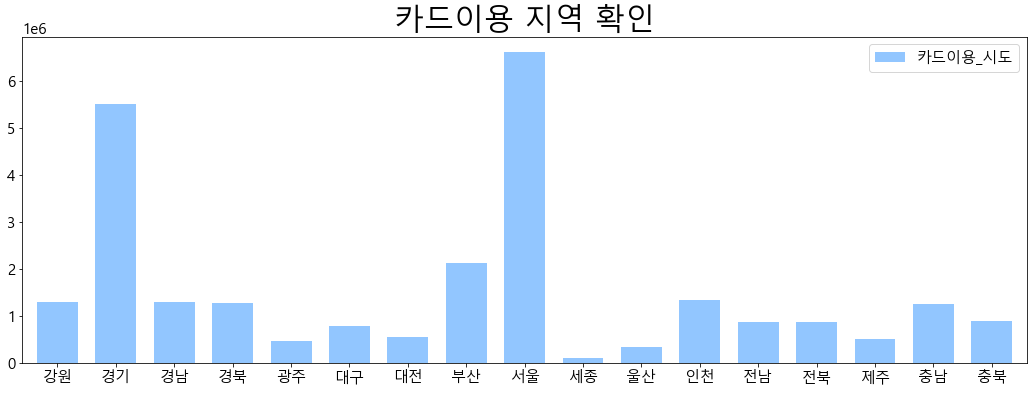

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

Text(0.5, 1.0, '카드사용 고객거주 지역 확인')

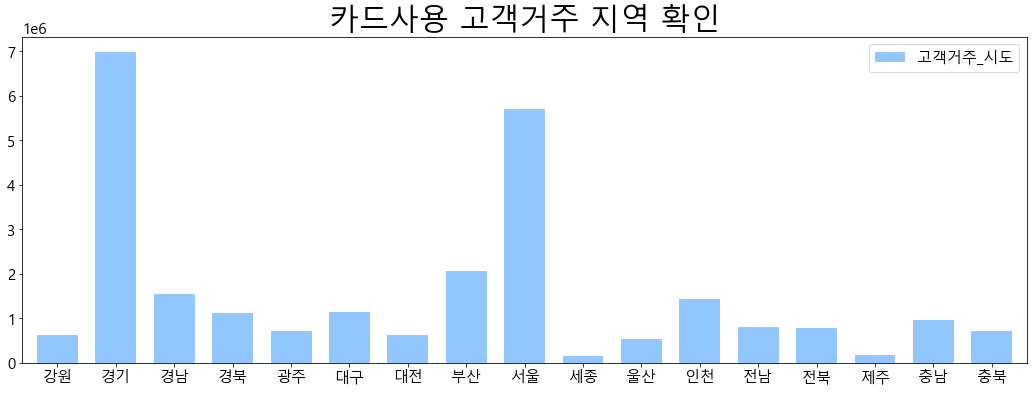

In [ ]:
plt.style.use( 'seaborn-pastel' )
df1_card_sido.plot( kind = 'bar', figsize = ( 18, 6 ), width = 0.7 )
plt.xticks( rotation = 'horizontal' ) 
plt.title( '카드이용 지역 확인', size = 30 )
plt.show()

plt.style.use( 'seaborn-pastel' )
df1_sido.plot( kind = 'bar', figsize = ( 18, 6 ), width = 0.7 )
plt.xticks( rotation = 'horizontal' ) 
plt.title( '카드사용 고객거주 지역 확인', size = 30 )
plt.show()

+ 카드이용 지역과 카드 사용 고객 거주지역은 서울과 경기지역이 다른 지역에 비해 많음을 알 수 있다.



In [ ]:
print( df1.업종명.unique() )
print( '★업종 개수: ',len(df1.업종명.unique()))

df1_kind = pd.DataFrame(  df1.업종명.value_counts() )
df1_kind

['건강보조식품 소매업' '골프장 운영업' '과실 및 채소 소매업' '관광 민예품 및 선물용품 소매업'
 '그외 기타 스포츠시설 운영업' '그외 기타 종합 소매업' '기타 대형 종합 소매업' '기타 외국식 음식점업' '기타 주점업'
 '기타음식료품위주종합소매업' '마사지업' '비알콜 음료점업' '빵 및 과자류 소매업' '서양식 음식점업' '수산물 소매업'
 '슈퍼마켓' '스포츠 및 레크레이션 용품 임대업' '여관업' '욕탕업' '육류 소매업' '일반유흥 주점업' '일식 음식점업'
 '전시 및 행사 대행업' '중식 음식점업' '차량용 가스 충전업' '차량용 주유소 운영업' '체인화 편의점'
 '피자 햄버거 샌드위치 및 유사 음식점업' '한식 음식점업' '호텔업' '화장품 및 방향제 소매업' '휴양콘도 운영업' '여행사업'
 '자동차 임대업' '면세점' '버스 운송업' '택시 운송업' '기타 수상오락 서비스업' '내항 여객 운송업'
 '그외 기타 분류안된 오락관련 서비스업' '정기 항공 운송업']
★업종 개수:  41


,업종명
한식 음식점업,3892220
체인화 편의점,3386049
슈퍼마켓,1727569
차량용 주유소 운영업,1705191
비알콜 음료점업,1672797
기타 대형 종합 소매업,1576615
서양식 음식점업,1484037
피자 햄버거 샌드위치 및 유사 음식점업,1422846
빵 및 과자류 소매업,1044785
중식 음식점업,739461


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

Text(0.5, 0, '가맹점 업종명')

Text(0, 0.5, '매출 발생 금액 평균')

Text(0.5, 1.0, '업종 이용 순위 상위 5')

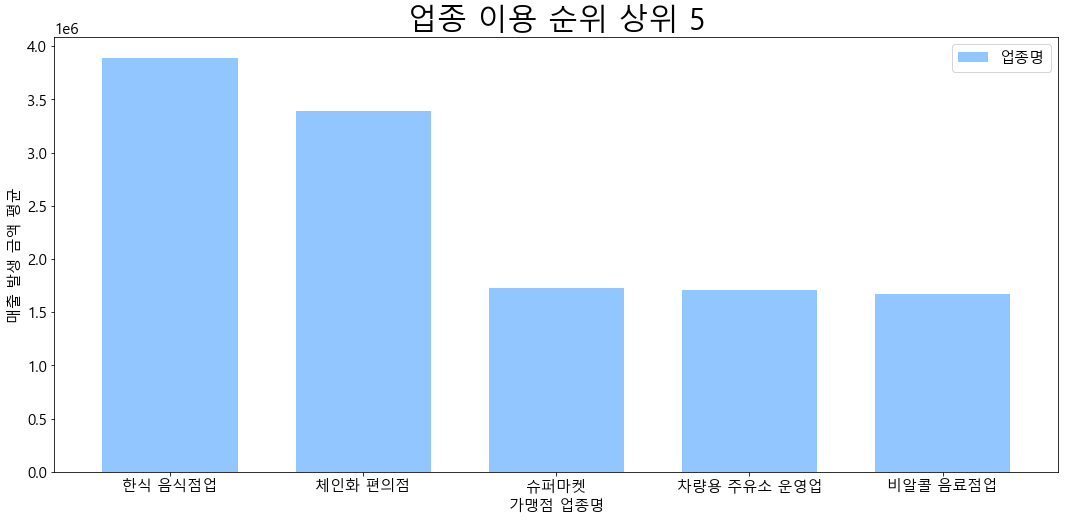

In [ ]:
plt.style.use( 'seaborn-pastel' )
df1_kind.head(5).plot( kind = 'bar', figsize = ( 18, 8 ), width = 0.7 )
plt.xticks( rotation = 'horizontal' )
plt.xlabel( '가맹점 업종명', size = 15 )
plt.ylabel( '매출 발생 금액 평균', size = 15 )
plt.title( '업종 이용 순위 상위 5', size = 30 )
plt.show()

In [ ]:
print( df1.연령대.unique())
df1_age = pd.DataFrame(  df1.연령대.value_counts().sort_index(ascending=True) )
df1_age


[20 30 40 50 60 70 10]


,연령대
10,334238
20,5361385
30,5857431
40,6116501
50,4698760
60,2752895
70,926904


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000129EE551D08>],
      dtype=object)

Text(0.5, 1.0, '연령대 분포 파악 ')

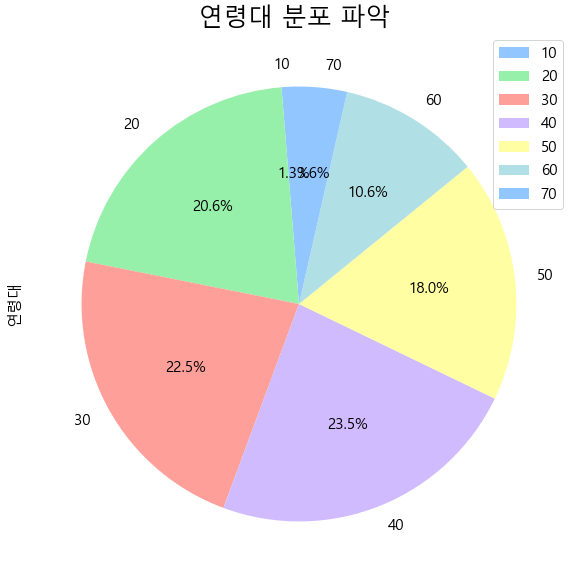

In [ ]:
plt.style.use( 'seaborn-pastel')
df1_age.plot( kind = 'pie', figsize = (10,10), autopct = '%1.1f%%', startangle = 90, subplots=True)
plt.title( '연령대 분포 파악 ', size = 25 )
plt.show()

- 연령대는 10대부터 70대까지 구성되어 있으며, **40대 > 30대 > 20대 > 50대 > 60대 > 70대 > 10대 순으로** 20~ 40대가 카드 사용이 많은 것으로 나타났다.

In [ ]:
print( df1.성별.unique())
df1_sex = df1.성별.value_counts()
df1_sex = pd.DataFrame(data=df1_sex)
df1_sex 


[1 2]


,성별
1,15310497
2,10737617


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000129EE631448>],
      dtype=object)

Text(0.5, 1.0, '카드사용 성별 확인')

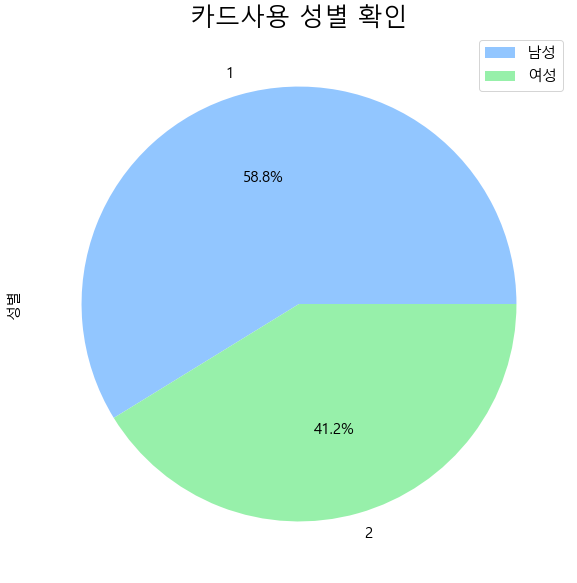

In [ ]:
plt.style.use( 'seaborn-pastel')
df1_sex.plot( kind = 'pie', figsize = ( 10,10), autopct = '%1.1f%%' ,subplots=True   )
plt.title( '카드사용 성별 확인', size = 25 )
plt.legend(labels=('남성','여성'))

- **성별 (1: 남성, 2: 여성) 기준** 분포를 살펴보면 남성이 여성보다 카드 사용량이 많은 것을 확인할 수 있다.

In [ ]:
print( df1.가구생애주기.unique()) 
df1_cycle = pd.DataFrame(  df1.가구생애주기.value_counts().sort_index(ascending=True) )
df1_cycle


[1 2 3 4 5]


,가구생애주기
1,5822782
2,6530421
3,4271637
4,5743475
5,3679799


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000129EEA55DC8>],
      dtype=object)

Text(0.5, 1.0, '생애주기별 분포 파악 ')

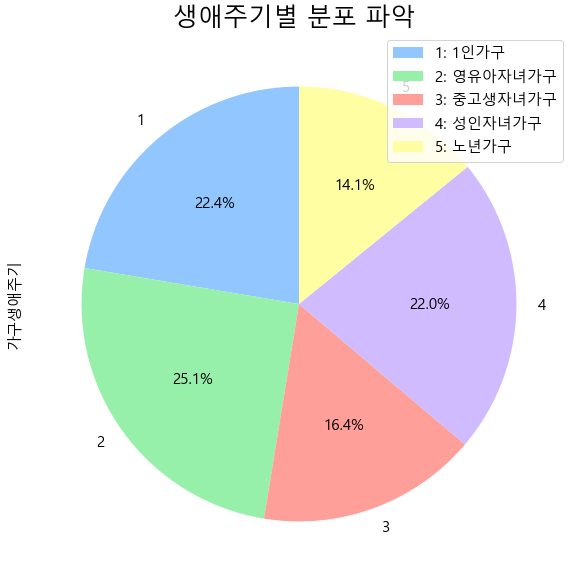

In [ ]:
plt.style.use( 'seaborn-pastel')
df1_cycle.plot( kind = 'pie', figsize = (10,10), autopct = '%1.1f%%', startangle = 90, subplots=True)
plt.title( '생애주기별 분포 파악 ', size = 25 )
plt.legend(labels=('1: 1인가구', '2: 영유아자녀가구', '3: 중고생자녀가구', '4: 성인자녀가구', '5: 노년가구'))
plt.show()

- 카드사용 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구) 기준 분포를 살펴보면   
 **영유아자녀가구 > 1인가구 > 성인자녀가구 > 중고생자녀가구 > 노년가구** 순으로 나타난다. 

**카드 이용금액 최고 / 최저 금액**

In [ ]:
print('	카드 이용 최고 금액	: {}원'.format(	df1.이용금액.max()	)) 
print('	카드 이용 최저 금액	:	{}원'.format(	df1.이용금액.min()	))

	카드 이용 최고 금액	: 2349523701원
	카드 이용 최저 금액	:	20원


**최대 이용고객수(명) / 이용건수(건) 정보 파악**



In [ ]:
df1[df1.이용고객수==df1.이용고객수.max()] 
df1[df1.이용건수==df1.이용건수.max()]

,연월,카드이용_시도,카드이용_시군구,업종명,고객거주_시도,고객거주_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
13451048,2019-08-01,제주,제주시,한식 음식점업,제주,제주시,50,1,4,32813,2349523701,59062


,연월,카드이용_시도,카드이용_시군구,업종명,고객거주_시도,고객거주_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
12230816,2019-08-01,경기,화성시,체인화 편의점,경기,화성시,30,1,2,32728,924209390,120357


---------------------------------------------------------------------------


### **2-3 각 변수 간 통계량 확인**

1) 카드 사용일자별 이용고객수 / 이용금액 / 이용건수 파악   
2) 업종별 이용고객수 / 이용금액 / 이용건수 파악   
3) 연령대별 이용고객수 / 이용금액 / 이용건수 파악   
4) 가구생애주기에 따른 이용고객수 / 이용금액 / 이용건수 파악    



#### **1) 카드 사용일자별 이용고객수 / 이용금액 / 이용건수 파악**



In [ ]:
# df1_year1 = df1.groupby( ( '연월' ), as_index = False ).이용고객수.sum()
# df1_year1

# # sns.set_style( 'darkgrid' )
# # plt.figure( figsize = ( 18, 6 ) )
# # plt.title("카드 월별 이용고객수 합계 파악", size = 25)
# # plt.xlabel( '이용고객 수', size = 15 )
# # sns.lineplot(data=df1_year1, x='연월', y='이용고객수', color='r', linewidth=4, ci=None, marker='o')

# df1_year2 = df1.groupby( ( '연월' ), as_index = False ).이용금액.mean()
# df1_year2

# sns.set_style( 'darkgrid' )
# plt.figure( figsize = ( 18, 6 ) )
# plt.title("카드 월별 이용금액 평균 파악", size = 25)
# plt.xlabel( '이용금액', size = 15 )
# sns.lineplot(data=df1_year2, x='연월', y='이용금액', color='b', linewidth=4,ci=None, marker='o')

# df1_year3 = df1.groupby( ( '연월' ), as_index = False ).이용건수.sum()
# df1_year3

# sns.set_style( 'darkgrid' )
# plt.figure( figsize = ( 18, 6 ) )
# plt.title("카드 월별 이용건수 합계 파악", size = 25)
# plt.xlabel( '이용건수', size = 15 )
# sns.lineplot(data=df1_year3, x='연월', y='이용건수', color='g', linewidth=4,ci=None, marker='o')

Text(0.5, 1.0, '월별 이용고객수 /  이용 건수 / 이용 금액 확인 ')

Text(0.5, 0, '연월')

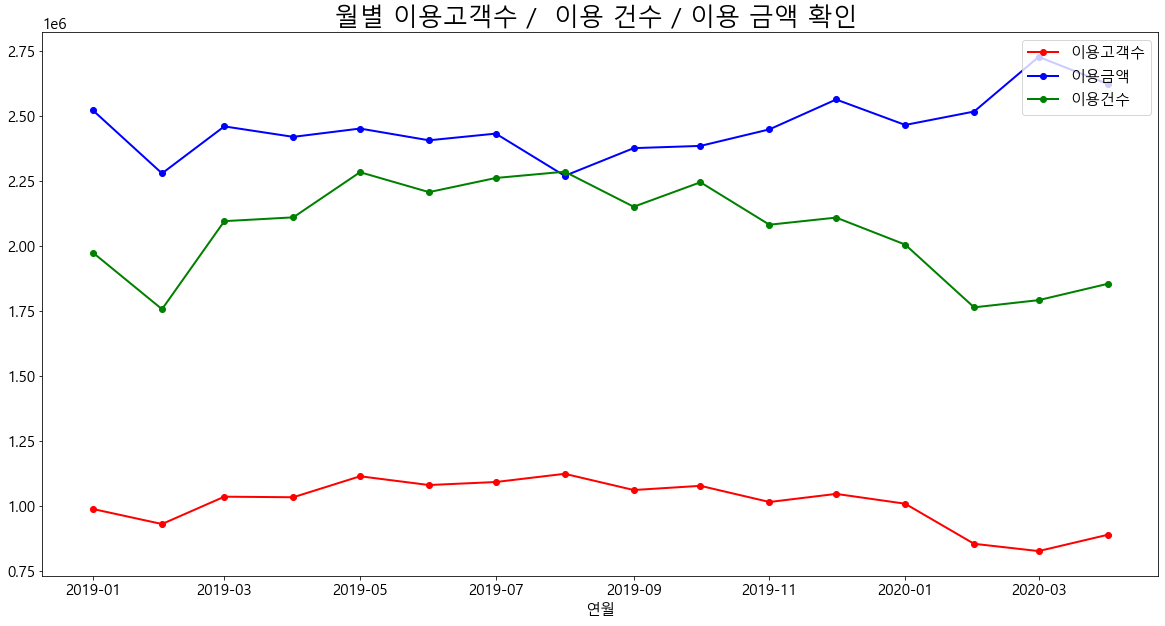

In [ ]:
df1_year1 = df1.groupby( ( '연월' ), as_index = False ).이용고객수.sum()
df1_year1['이용고객수'] = (df1_year1['이용고객수'] / 100).round(0).astype(int)

df1_year2 = df1.groupby( ( '연월' ), as_index = False ).이용금액.mean()
df1_year2['이용금액'] = df1_year2['이용금액'].round(0).astype(int)

df1_year3 = df1.groupby( ( '연월' ), as_index = False ).이용건수.sum()
df1_year3['이용건수'] = (df1_year3['이용건수'] / 100).round(0).astype(int)


fig = plt.figure( figsize = ( 20, 10) ) 
ax1 = fig.add_subplot( 1, 1, 1 )
ax2 = fig.add_subplot( 1, 1, 1 )
ax3 = fig.add_subplot(1,1,1)


ax1.plot(df1_year1['연월'], df1_year1['이용고객수'], color = 'r', linewidth=2,  marker='o', label = '이용고객수(100명)' )
ax2.plot(df1_year2['연월'], df1_year2['이용금액'], color = 'b', linewidth=2,  marker='o' , label = '이용금액(원)')
ax3.plot(df1_year3['연월'], df1_year3['이용건수'], color = 'g', linewidth=2,  marker='o', label = '이용건수(100건)' )

plt.title('월별 이용고객수 /  이용 건수 / 이용 금액 확인 ', size = 25)
plt.xlabel('연월')
plt.legend(loc = 'upper right', labels=('이용고객수','이용금액','이용건수')) 
plt.show()

- 국내에 코로나의 확진세가 가장 심했던 2월과 3월의 카드 이용고객수와 이용건수는 줄었지만 이용금액은 증가하였다.
- 이를 통해 적은 고객이 한번에 많은 금액을 소비하였음을 알 수 있다.

#### **2) 업종별 이용고객수 / 이용금액 / 이용건수 파악**



In [ ]:
df1_kind=df1.groupby(df1.업종명).mean()
df1_kind #업종별 수치형데이터  평균 파악

,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
업종명,,,,,,
건강보조식품 소매업,48.666313,1.554452,3.740093,11.021011,1.252743e+06,13.105629
골프장 운영업,48.683079,1.266524,3.827367,15.554096,2.548883e+06,21.103894
과실 및 채소 소매업,44.743825,1.504693,3.404917,31.972203,1.234030e+06,49.269689
관광 민예품 및 선물용품 소매업,37.051030,1.525552,2.693414,6.118145,1.930843e+05,7.535178
그외 기타 분류안된 오락관련 서비스업,32.983051,1.366102,2.311864,4.369492,1.290027e+05,4.894915
그외 기타 스포츠시설 운영업,35.639164,1.429444,2.553205,7.622698,2.462951e+05,12.538775
그외 기타 종합 소매업,39.865367,1.462340,2.948754,30.750100,2.930422e+06,61.053896
기타 대형 종합 소매업,37.997082,1.462106,2.773068,70.218112,4.908277e+06,154.958912
기타 수상오락 서비스업,34.755769,1.179503,2.482769,5.212916,2.659587e+05,8.015133


In [ ]:
kind_top = df1_kind.sort_values( by = '이용금액', ascending = False ).head(10)
kind_top


,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
업종명,,,,,,
기타 대형 종합 소매업,37.997082,1.462106,2.773068,70.218112,4.908277e+06,154.958912
정기 항공 운송업,37.884890,1.473159,2.756768,19.536375,4.894205e+06,20.952723
차량용 주유소 운영업,42.477470,1.303850,3.210732,54.414605,4.764497e+06,85.803420
택시 운송업,36.615233,1.469109,2.676180,210.504849,4.512127e+06,601.358660
슈퍼마켓,39.157191,1.395250,2.893166,93.138841,4.183181e+06,261.286885
한식 음식점업,39.241071,1.392796,2.901445,79.748402,3.724098e+06,124.464098
육류 소매업,44.491275,1.460943,3.376245,75.230070,3.575350e+06,113.241732
일반유흥 주점업,35.845173,1.287748,2.576427,18.655891,3.110804e+06,28.131289
그외 기타 종합 소매업,39.865367,1.462340,2.948754,30.750100,2.930422e+06,61.053896


- 정기항송 운송업, 기타 대형 종합 소매업, 차량용 주요소 운영업종이 이용금액 평균이 높은 것을 알 수 있다.

In [ ]:
df1_kind1 = df1.groupby( ( '업종명' ), as_index = False ).이용고객수.sum()
# df1_kind1
df1_kind2 = df1.groupby( ( '업종명' ), as_index = False ).이용금액.mean()
# df1_kind2
df1_kind3 = df1.groupby( ( '업종명' ), as_index = False ).이용건수.sum()
# df1_kind3

In [ ]:
d = df1_kind1.sort_index().merge(df1_kind2.sort_index()).merge(df1_kind3.sort_index())

In [ ]:
d.이용고객수 = (d.이용고객수 / 100).round(0).astype(int)
d.이용건수 = (d.이용건수 / 100).round(0).astype(int)

<BarContainer object of 41 artists>

<BarContainer object of 41 artists>

<BarContainer object of 41 artists>

[Text(0, 0, '건강보조식품 소매업'),
 Text(0, 0, '골프장 운영업'),
 Text(0, 0, '과실 및 채소 소매업'),
 Text(0, 0, '관광 민예품 및 선물용품 소매업'),
 Text(0, 0, '그외 기타 분류안된 오락관련 서비스업'),
 Text(0, 0, '그외 기타 스포츠시설 운영업'),
 Text(0, 0, '그외 기타 종합 소매업'),
 Text(0, 0, '기타 대형 종합 소매업'),
 Text(0, 0, '기타 수상오락 서비스업'),
 Text(0, 0, '기타 외국식 음식점업'),
 Text(0, 0, '기타 주점업'),
 Text(0, 0, '기타음식료품위주종합소매업'),
 Text(0, 0, '내항 여객 운송업'),
 Text(0, 0, '마사지업'),
 Text(0, 0, '면세점'),
 Text(0, 0, '버스 운송업'),
 Text(0, 0, '비알콜 음료점업'),
 Text(0, 0, '빵 및 과자류 소매업'),
 Text(0, 0, '서양식 음식점업'),
 Text(0, 0, '수산물 소매업'),
 Text(0, 0, '슈퍼마켓'),
 Text(0, 0, '스포츠 및 레크레이션 용품 임대업'),
 Text(0, 0, '여관업'),
 Text(0, 0, '여행사업'),
 Text(0, 0, '욕탕업'),
 Text(0, 0, '육류 소매업'),
 Text(0, 0, '일반유흥 주점업'),
 Text(0, 0, '일식 음식점업'),
 Text(0, 0, '자동차 임대업'),
 Text(0, 0, '전시 및 행사 대행업'),
 Text(0, 0, '정기 항공 운송업'),
 Text(0, 0, '중식 음식점업'),
 Text(0, 0, '차량용 가스 충전업'),
 Text(0, 0, '차량용 주유소 운영업'),
 Text(0, 0, '체인화 편의점'),
 Text(0, 0, '택시 운송업'),
 Text(0, 0, '피자 햄버거 샌드위치 및 유사 음식점업'),
 Text(0, 0, '한식 음식점업'),
 Te

Text(0.5, 1.0, '업종별 이용고객수, 이용금액, 이용건수 비교')

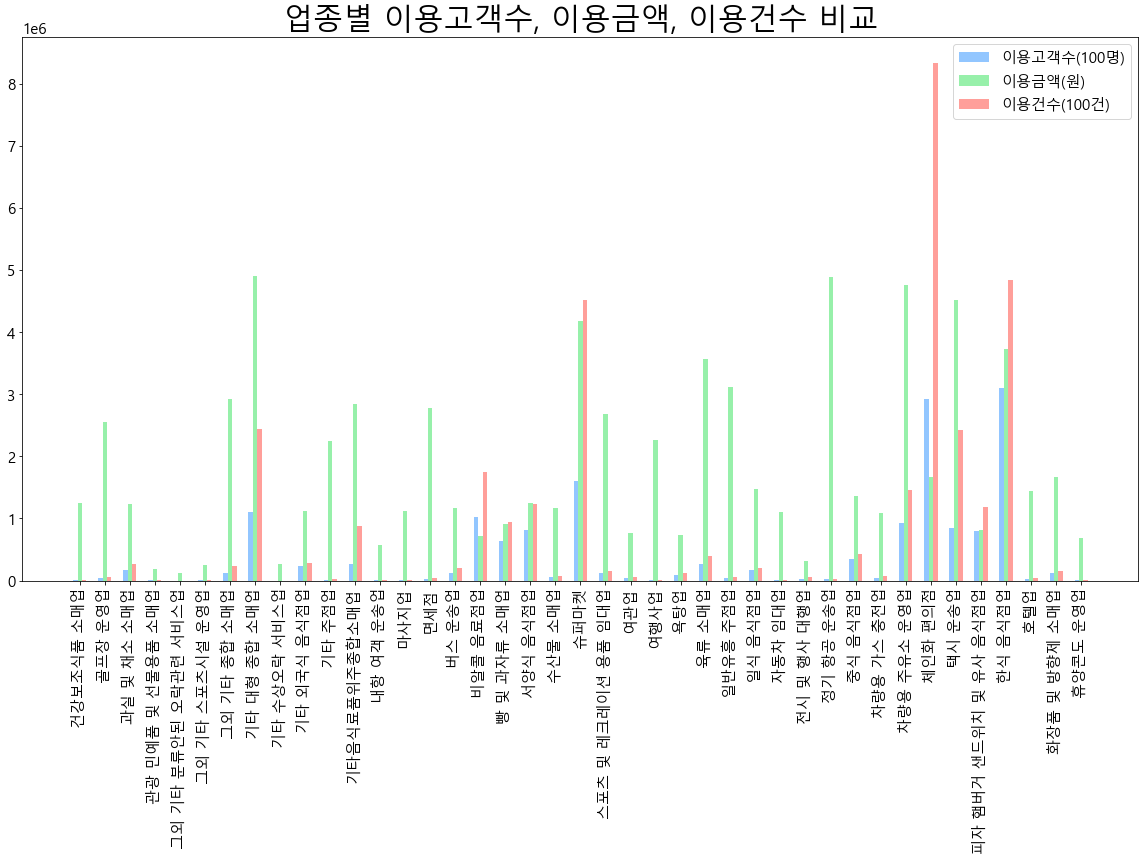

In [ ]:
fig = plt.figure( figsize = ( 20, 10) ) 
ax1 = fig.add_subplot( 1, 1, 1 )
labels = list(d.업종명)
x=np.arange(len(labels))
width = 0.35

ax1.bar(x-width/2, d.이용고객수, width/2, label = '이용고객수(100명)')
ax1.bar(x, d.이용금액, width/2, label = '이용금액(원)')
ax1.bar(x+width/2, d.이용건수, width/2, label = '이용건수(100건)')


ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation = 90)
ax1.legend()
ax1.set_title('업종별 이용고객수, 이용금액, 이용건수 비교',size=30)

plt.show()

- 업종별 이용건수는 체인화 편의점과 한식음식업, 슈퍼마켓, 기타 대형 종합 소매업의 이용건수가 가장 높게 나왔다. 
- 업종별 이용 금액은 기타 대형 종합 소매업과 슈퍼마켓, 정기 항공 운송업, 주유소, 택시, 한식음식업이 높게 나왔다.
- 업종별 이용 고객수는 주유소와 한식 음식업이 높게 나옴을 알 수 있다.
- 체인화 편의점은 이용 건수는 다른 업종에 비해 월등히 높았지만 이용금액은 높지 않은 것으로 보아 편의점에서 주로 소액으로 소비를 하였음을 알 수 있다.
- 반대로 대형 종합 소매업은 이용건수는 낮지만 이용금액이 가장 높은 것으로 보아 대형 종합 소매업의 이용 건수마다의 이용 금액이 크다는 점을 알 수 있다.

#### **3) 연령대별 이용고객수 / 이용금액 / 이용건수 파악**



,연령대,이용고객수
0,10,14439288
1,20,309702692
2,30,360424219
3,40,373770607
4,50,347178749
5,60,172462591
6,70,41532922


<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, '연령대별 이용고객수 분포 파악')

Text(0.5, 0, '이용고객수')

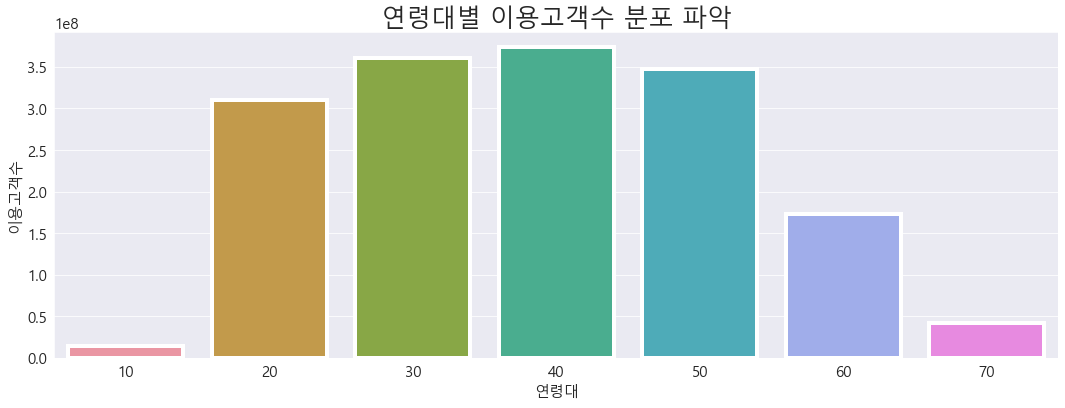

In [ ]:


df1_age1 = df1.groupby( ( '연령대' ), as_index = False ).이용고객수.sum() 
df1_age1

plt.style.use( 'seaborn-pastel' )
sns.set_style( 'darkgrid' )
 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


plt.figure( figsize = ( 18, 6 ) )
plt.title("연령대별 이용고객수 분포 파악", size = 25)
plt.xlabel( '이용고객수', size = 15 )
sns.barplot(data=df1_age1 , x='연령대', y='이용고객수', linewidth=4,ci=None)

- 연령대별 **이용고객수 합계**를 살펴보면 40대가 가장 높으며,  20~ 50대가 카드 이용고객 수가  주를 이루는 것을 확인할 수 있다.


,연령대,이용금액
0,10,5.066001e+05
1,20,1.379067e+06
2,30,2.085051e+06
3,40,2.581011e+06
4,50,3.563529e+06
5,60,3.367574e+06
6,70,2.439293e+06


<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, '연령대별 이용금액 평균 파악')

Text(0.5, 0, '이용금액')

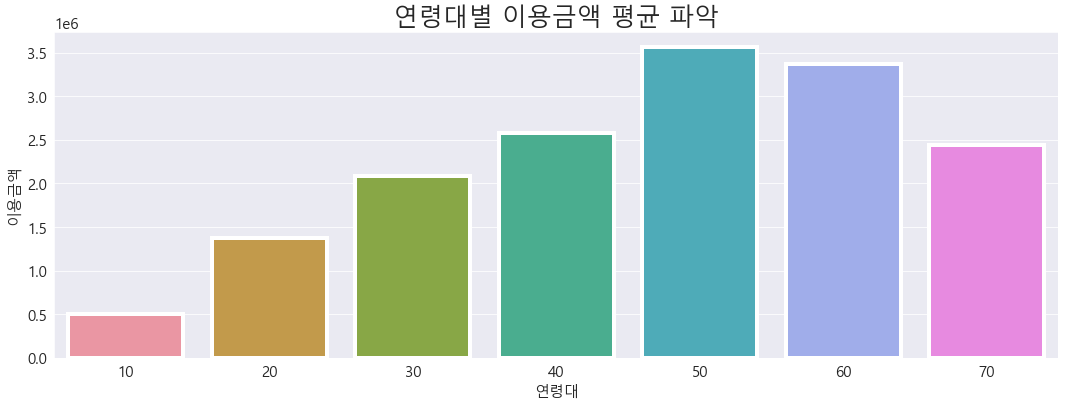

In [ ]:
df1_age2 = df1.groupby( ( '연령대' ), as_index = False ).이용금액.mean() 
df1_age2

plt.style.use( 'seaborn-pastel' )
sns.set_style( 'darkgrid' )
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure( figsize = ( 18, 6 ) )
plt.title("연령대별 이용금액 평균 파악", size = 25)
plt.xlabel( '이용금액', size = 15 )
sns.barplot(data=df1_age2 , x='연령대', y='이용금액', linewidth=4,ci=None)

,연령대,이용건수
0,10,29791796
1,20,690824824
2,30,733935860
3,40,757833103
4,50,678642571
5,60,327898299
6,70,79602986


<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, '연령대별 이용건수 합계 파악')

Text(0.5, 0, '이용건수')

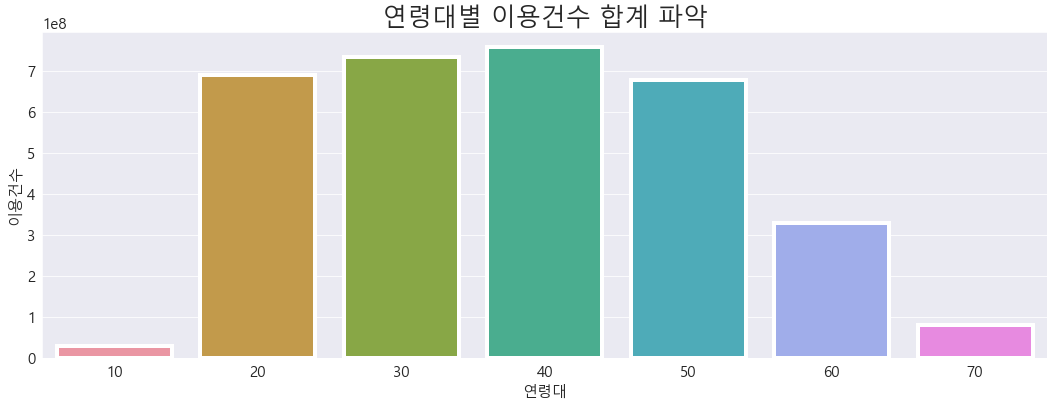

In [ ]:
df1_age3 = df1.groupby( ( '연령대' ), as_index = False ).이용건수.sum() 
df1_age3

plt.style.use( 'seaborn-pastel' )
sns.set_style( 'darkgrid' )

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


plt.figure( figsize = ( 18, 6 ) )
plt.title("연령대별 이용건수 합계 파악", size = 25)
plt.xlabel( '이용건수', size = 15 )
sns.barplot(data=df1_age3 , x='연령대', y='이용건수', linewidth=4,ci=None)

- 연령대별 카드 이용건수 합계는 연령대별 이용고객수 합계와 마찬가지로 20~40대와 같은 형태를 보인다.

#### **4) 가구생애주기에 따른 이용고객수 / 이용금액 / 이용건수 파악**
-  1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구


In [ ]:
df1_sex1 = df1.groupby( ( '가구생애주기' ), as_index = False ).이용고객수.sum() 
df1_sex1
df1_age2 = df1.groupby( ( '가구생애주기' ), as_index = False ).이용금액.mean() 
df1_age2
df1_age3 = df1.groupby( ( '가구생애주기' ), as_index = False ).이용건수.sum() 
df1_age3


,가구생애주기,이용고객수
0,1,328141943
1,2,392425939
2,3,291383147
3,4,393564526
4,5,213995513


,가구생애주기,이용금액
0,1,1.340979e+06
1,2,2.048832e+06
2,3,2.858724e+06
3,4,3.292014e+06
4,5,3.133749e+06


,가구생애주기,이용건수
0,1,734058057
1,2,795508329
2,3,585565922
3,4,775895846
4,5,407501285


<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, '가구새애주기별 이용고객수 분포 파악')

Text(0.5, 0, '이용고객수')

<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, '가구생애주기별 이용금액 평균 파악')

Text(0.5, 0, '이용금액')

<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, '가구생애주기별 이용건수 평균 파악')

Text(0.5, 0, '이용건수')

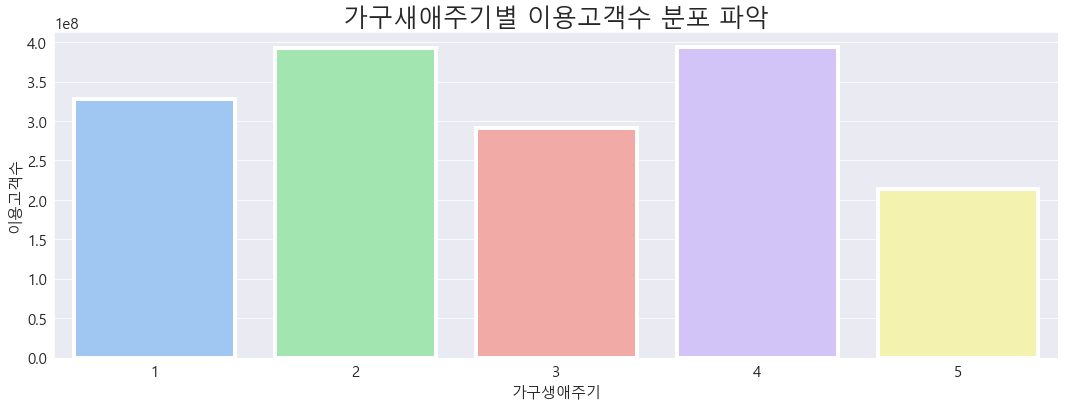

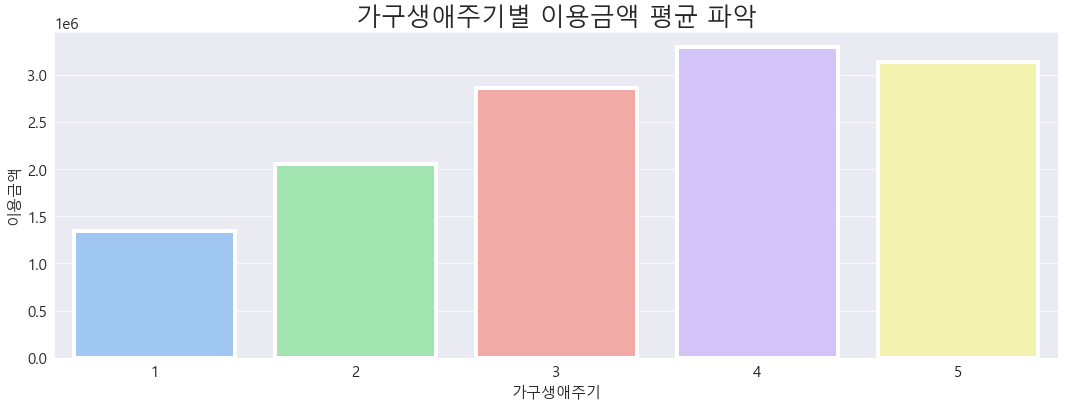

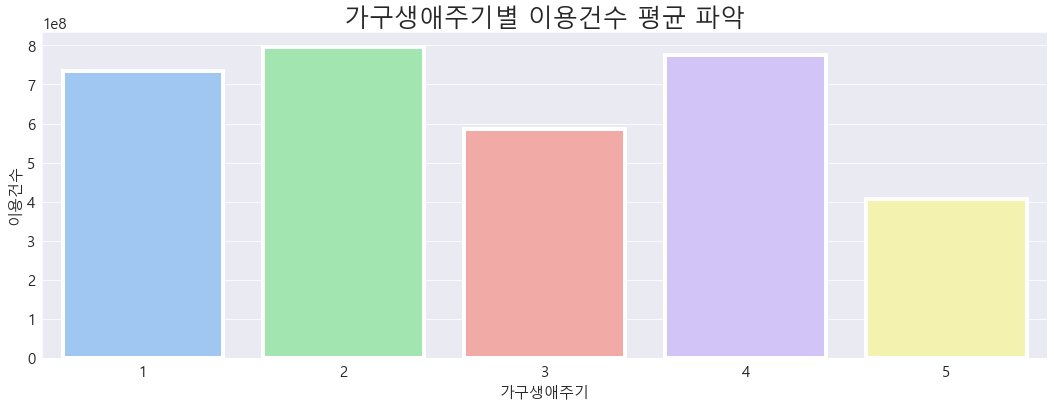

In [ ]:

plt.style.use( 'seaborn-pastel' )
sns.set_style( 'darkgrid' )
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure( figsize = ( 18, 6 ) )
plt.title("가구생애주기별 이용고객수 분포 파악", size = 25)
plt.xlabel( '이용고객수', size = 15 )
sns.barplot(data=df1_sex1 , x='가구생애주기', y='이용고객수', linewidth=4,ci=None)

plt.style.use( 'seaborn-pastel' )
sns.set_style( 'darkgrid' )
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure( figsize = ( 18, 6 ) )
plt.title("가구생애주기별 이용금액 평균 파악", size = 25)
plt.xlabel( '이용금액', size = 15 )
sns.barplot(data=df1_age2 , x='가구생애주기', y='이용금액', linewidth=4,ci=None)

plt.style.use( 'seaborn-pastel' )
sns.set_style( 'darkgrid' )
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure( figsize = ( 18, 6 ) )
plt.title("가구생애주기별 이용건수 평균 파악", size = 25)
plt.xlabel( '이용건수', size = 15 )
sns.barplot(data=df1_age3 , x='가구생애주기', y='이용건수', linewidth=4,ci=None)

- 가구생애주기별 카드 이용금액 평균 경우 4: 성인자녀가구가  가장 높은 것을 알 수 있다.
- 가구생애주기별 이용고객수가 2: 영유아자녀가구,  4: 성인자녀가구가 높은 것을 알 수 있다.
- 가구생애주기별 이용건수 경우 2: 영유아자녀가구 > 4: 성인자녀가구 > 1인가구 순으로 나타난다.
- 공통적으로 가구생애주기별 **성인자녀가구**가 카드 이용량이 높은 것으로 확인할 수 있다.

# 모델 생성 및 예측

- 연월, 카드이용시도, 업종명을 숫자로 바꾼 파생변수로 추가 후 모델에 변수로 사용

In [ ]:
df1.연월.value_counts().sort_index()

In [ ]:
df1['연월1'] = df1['연월']

In [ ]:
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[0],1)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[1],2)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[2],3)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[3],4)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[4],5)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[5],6)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[6],7)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[7],8)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[8],9)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[9],10)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[10],11)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[11],12)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[12],13)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[13],14)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[14],15)
df1.연월1 = df1.연월1.replace(df1.연월1.value_counts().sort_index().index[15],16)

In [ ]:
df1.연월1 = df1.연월1.astype(int)

- 201901에서 202004까지 16개 월을 1에서 16으로 대체

In [ ]:
df1.카드이용_시도.value_counts().sort_index()

In [ ]:
df1['카드이용_시도1'] = df1['카드이용_시도']

In [ ]:
df1.카드이용_시도1 = df1.카드이용_시도1.replace('강원', 1)
df1.카드이용_시도1 = df1.카드이용_시도1.replace('경기', 2)
df1.카드이용_시도1 = df1.카드이용_시도1.replace('경남', 3)
df1.카드이용_시도1 = df1.카드이용_시도1.replace('경북', 4)
df1.카드이용_시도1 = df1.카드이용_시도1.replace('광주', 5)
df1.카드이용_시도1 = df1.카드이용_시도1.replace('대구', 6)
df1.카드이용_시도1 = df1.카드이용_시도1.replace('대전', 7)
df1.카드이용_시도1 = df1.카드이용_시도1.replace('부산', 8)
df1.카드이용_시도1 = df1.카드이용_시도1.replace('서울', 9)
df1.카드이용_시도1 = df1.카드이용_시도1.replace('세종', 10)
df1.카드이용_시도1 = df1.카드이용_시도1.replace('울산', 11)
df1.카드이용_시도1 = df1.카드이용_시도1.replace('인천', 12)
df1.카드이용_시도1 = df1.카드이용_시도1.replace('전남', 13)
df1.카드이용_시도1 = df1.카드이용_시도1.replace('전북', 14)
df1.카드이용_시도1 = df1.카드이용_시도1.replace('제주', 15)
df1.카드이용_시도1 = df1.카드이용_시도1.replace('충남', 16)
df1.카드이용_시도1 = df1.카드이용_시도1.replace('충북', 17)

- 카드 이용 지역을 각 지역의 이름 순으로 1부터 17까지 변경

In [ ]:
df1['업종명1'] = df1['업종명']

In [ ]:
len(df1.업종명.value_counts().sort_index().index)

In [ ]:
for i in range(len(df1.업종명.value_counts().sort_index().index)) :
    df1.업종명1 = df1.업종명1.replace(df1.업종명.value_counts().sort_index().index[i],i+1)

- 업종명도 업종명의 이름순으로 번호를 붙여 대체

In [ ]:
df1    # 파생변수 확인

In [ ]:
df1.to_csv('모델링용.csv')   # 메모리 부족 현상 방지를 위해 따로 저장

### Keras 이용

In [3]:
df1 = pd.read_csv('모델링용.csv')  # 따로 저장한 파일 불러오기

In [4]:
d = pd.DataFrame(df1['이용금액'].groupby([df1['연월1'],df1['카드이용_시도1'],df1['업종명1']]).sum())

- 제출 양식에 맞추기 위해 이용금액의 총액을 연월, 시도, 업종명으로 groupby를 하여 알아보고 나온 결과를 데이터프레임으로 저장

In [ ]:
d.to_csv('모델링용2.csv',encoding = 'utf-8')  

- 마찬가지로 메모리 부족 현상 방지 및 불필요한 전처리를 하지 않기 위해 따로 csv파일로 저장

In [5]:
df2 = pd.read_csv('모델링용2.csv')   # 위에 저장한 파일 다시 불러오기

#### X_train, X_test, y_train, y_test로 나누기

In [6]:
X = df2

In [7]:
train_df = X.sample( frac = 0.8, random_state = 0 )
test_df = X.drop( train_df.index )

In [8]:
y_train = train_df.pop( '이용금액' )
y_test = test_df.pop( '이용금액' )

In [9]:
X_train = np.asarray( train_df)
X_test = np.asarray( test_df )

In [10]:
X_train = np.array( X_train )
X_test = np.array( X_test )

In [11]:
y_train = np.array( y_train )
y_test = np.array( y_test )

- X_train, X_test, y_train, y_test로 나누기 완료
- 나눠진 데이터를 Keras모델에 넣어본다.

In [12]:
model = Sequential()
model.add( Dense( 1, input_dim = 3, activation = 'linear' ) )
sgd = optimizers.SGD( lr =0.00001 )
model.compile( optimizer = sgd ,loss = 'mse', metrics = [ 'mse', 'mae' ] )
history = model.fit( X_train, y_train, batch_size = 100, epochs = 100, validation_split = 0.2 )

Train on 6430 samples, validate on 1608 samples
Epoch 1/100
6430/6430 [==============================] - 1s 113us/sample - loss: 407301743622555107328.0000 - mse: 407301750387202064384.0000 - mae: 6473976832.0000 - val_loss: 391318061685424259072.0000 - val_mse: 391318088281571196928.0000 - val_mae: 7106900992.0000
Epoch 2/100
6430/6430 [==============================] - 0s 12us/sample - loss: 387446968816011116544.0000 - mse: 387446998111241633792.0000 - mae: 7466695168.0000 - val_loss: 383540927957641527296.0000 - val_mse: 383540899490683682816.0000 - val_mae: 7818099200.0000
Epoch 3/100
6430/6430 [==============================] - 0s 12us/sample - loss: 383736186271390892032.0000 - mse: 383736102387032522752.0000 - mae: 7946549248.0000 - val_loss: 381553059324074459136.0000 - val_mse: 381553088020780941312.0000 - val_mae: 8155578880.0000
Epoch 4/100
6430/6430 [==============================] - 0s 12us/sample - loss: 382835791377285709824.0000 - mse: 382835699120907223040.0000 - mae:

6430/6430 [==============================] - 0s 15us/sample - loss: 378534032933181980672.0000 - mse: 378534057789326622720.0000 - mae: 8307249152.0000 - val_loss: 377031428439016210432.0000 - val_mse: 377031403626156785664.0000 - val_mae: 8377343488.0000
Epoch 62/100
6430/6430 [==============================] - 0s 14us/sample - loss: 378519823768289148928.0000 - mse: 378519878487374823424.0000 - mae: 8378324480.0000 - val_loss: 377071168060427862016.0000 - val_mse: 377071161966617165824.0000 - val_mae: 8346036736.0000
Epoch 63/100
6430/6430 [==============================] - 0s 12us/sample - loss: 378507665488407166976.0000 - mse: 378507704694632087552.0000 - mae: 8357864960.0000 - val_loss: 377080474600355725312.0000 - val_mse: 377080485825220706304.0000 - val_mae: 8341410816.0000
Epoch 64/100
6430/6430 [==============================] - 0s 13us/sample - loss: 378507608826793951232.0000 - mse: 378507704694632087552.0000 - mae: 8384433152.0000 - val_loss: 377133493816876072960.0000 - 

- 손실함수의 값이 너무 크다.
- XGBoost로 모델을 바꿔보기로 한다.

### XGBoost 이용

In [13]:
import xgboost

In [14]:
model = xgboost.XGBRegressor(learning_rate=0.1,
                             max_depth=50,
                             n_estimators=1000) 

In [15]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=50,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

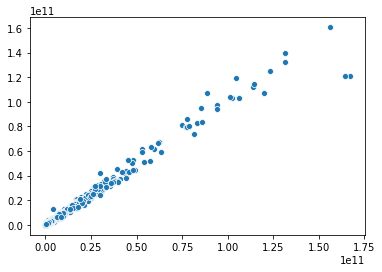

In [16]:
sns.scatterplot(y_test, model.predict(X_test))

In [17]:
predictions = [round(value) for value in model.predict(X_test)]

In [18]:
print('explained_variance_score: {}'.format(explained_variance_score(y_test, model.predict(X_test))))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, model.predict(X_test))))
print('r2_score: {}'.format(r2_score(y_test, model.predict(X_test))))

explained_variance_score: 0.9840562353676914
mean_squared_errors: 3.371480963386859e+18
r2_score: 0.9840509949945978


- 평균제곱오차는 크지만 결정계수와 explained_variance_score가 98%로 높게 나왔다.
- 이 모델을 이용하여 예측값을 구해보도록 한다.

### 예측값 구해보기

In [19]:
submission= pd.read_csv('submission.csv')  # 제출 양식 파일 불러오기

In [20]:
# 모델이 넣을 변수 모양을 만들기 위해 파생변수 생성
submission['업종명'] = submission['STD_CLSS_NM']
submission['연월'] = submission['REG_YYMM']
submission['시도'] = submission['CARD_SIDO_NM']  

- 모델에 사용했던 변수의 모양과 일치하게 하기 위해 변환을 함

In [21]:
for i in range(len(submission.STD_CLSS_NM.value_counts().sort_index().index)) :
    submission.업종명 = submission.업종명.replace(submission.STD_CLSS_NM.value_counts().sort_index().index[i],i+1)

In [22]:
for i in range(len(submission.CARD_SIDO_NM.value_counts().sort_index().index)) :
    submission.시도 = submission.시도.replace(submission.CARD_SIDO_NM.value_counts().sort_index().index[i],i+1)

In [23]:
submission.연월 = submission.연월.replace(submission.연월.value_counts().sort_index().index[0],16)
submission.연월 = submission.연월.replace(submission.연월.value_counts().sort_index().index[1],19)

- 변환이 완료된 후 예측값을 구하기 위해 변수를 추출하여 모델에 넣어본다

In [24]:
pred = submission[['연월','시도','업종명']]  # 모델에 넣을 변수만 추출

In [25]:
# NumPy 배열로 변경
pred = np.asarray(pred)
pred = np.array(pred)

In [26]:
submission.AMT = list(model.predict(pred).round(0).astype(int))

- 예측값을 얻어낸 후 AMT 변수에 저장하였다

In [27]:
submission.pop('업종명')
submission.pop('연월')
submission.pop('시도')

0        1
1        1
2        1
3        1
4        1
        ..
1389    17
1390    17
1391    17
1392    17
1393    17
Name: 시도, Length: 1394, dtype: int64

- 제출양식에 맞추기 위해 만들었던 파생변수들을 삭제한다.

In [28]:
# 예측값 확인
submission

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,0,202004,강원,건강보조식품 소매업,88823904
1,1,202004,강원,골프장 운영업,-2147483648
2,2,202004,강원,과실 및 채소 소매업,1121028224
3,3,202004,강원,관광 민예품 및 선물용품 소매업,14360784
4,4,202004,강원,그외 기타 분류안된 오락관련 서비스업,208554
...,...,...,...,...,...
1389,1389,202007,충북,피자 햄버거 샌드위치 및 유사 음식점업,1343510016
1390,1390,202007,충북,한식 음식점업,-2147483648
1391,1391,202007,충북,호텔업,14121494
1392,1392,202007,충북,화장품 및 방향제 소매업,459964000


- 예측값 중의 일부가 음수값이 나온다
- 일단 다른 모델을 이용하여 다른 예측값을 구해보기로 한다.

### Scikit-learn 이용

In [29]:
model1 = LinearRegression()

In [30]:
model1.fit(X_train, y_train)

LinearRegression()

In [31]:
model1.predict(X_test)

array([5.50962982e+09, 9.29818893e+09, 1.14630799e+10, ...,
       2.40720714e+09, 6.46637762e+09, 7.27821171e+09])

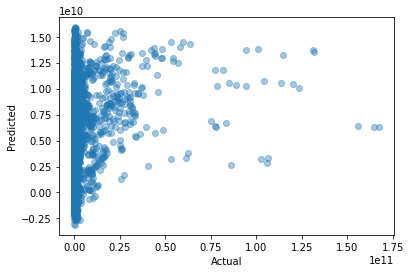

In [32]:
# 예측값과 실제값을 산점도로 비교
plt.scatter(y_test, model1.predict(X_test), alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

- 실제값과 예측값이 선형성을 띄고 있지 않다.

In [33]:
print(model1.score(X_train, y_train))

0.041394053636680805


- 정확도가 매우 낮음을 알 수 있다.
- 지금까지는 종속변수를 정규화하지 않은 상태로 모델을 만들었는데, 종속변수를 정규화를 해서 모델을 만들어 보기로 한다. 

## y데이터를 정규화를 해보자

In [34]:
df2 = pd.read_csv('모델링용2.csv')    # 이전에 모델에 사용했던 데이터프레임 불러오기

#### 정규화

In [35]:
df2_stats = df2.describe()
df2_stats = df2_stats.transpose()
df2_stats

,count,mean,std,min,25%,50%,75%,max
연월1,10048.0,8.462082e+00,4.593927e+00,1.0,4.000000e+00,8.000000e+00,1.200000e+01,1.600000e+01
카드이용_시도1,10048.0,8.998607e+00,4.952366e+00,1.0,5.000000e+00,9.000000e+00,1.300000e+01,1.700000e+01
업종명1,10048.0,2.105225e+01,1.177033e+01,1.0,1.100000e+01,2.100000e+01,3.100000e+01,4.100000e+01
이용금액,10048.0,6.353361e+09,1.885389e+10,16500.0,1.525807e+08,1.143855e+09,3.563478e+09,2.487874e+11


In [36]:
def normalization( x ):
  return ( x - df2_stats[ 'mean' ] ) / df2_stats[ 'std' ]

In [37]:
# 정규화 실시 
df3 = normalization(df2)
df2['이용금액'] = df3['이용금액']
df2

,연월1,카드이용_시도1,업종명1,이용금액
0,1,1,1,-0.329110
1,1,1,2,-0.271783
2,1,1,3,-0.268718
3,1,1,4,-0.335353
4,1,1,6,-0.336284
...,...,...,...,...
10043,16,17,37,-0.264122
10044,16,17,38,0.666052
10045,16,17,39,-0.336230
10046,16,17,40,-0.313084


In [38]:
# train, test 데이터로 나누기
train_df2 = df2.sample( frac = 0.8, random_state = 0 )
test_df2 = df2.drop( train_df2.index )

In [39]:
# y데이터 분리
y_train = train_df2.pop( '이용금액' )
y_test = test_df2.pop( '이용금액' )

In [40]:
# X,y 데이터를 NumPy 배열로 변경
X_train = np.asarray( train_df2)
X_test = np.asarray( test_df2)

In [41]:
X_train = np.array( train_df2)
X_test = np.array( test_df2)

In [42]:
y_train = np.array( y_train )
y_test = np.array( y_test )

### Keras 모델

In [44]:
model = Sequential()
model.add( Dense( 1, input_dim = 3, activation = 'linear' ) )
sgd = optimizers.SGD( lr =0.00001 )
model.compile( optimizer = sgd ,loss = 'mse', metrics = [ 'mse', 'mae' ] )
history = model.fit( X_train, y_train, batch_size = 100, epochs = 1500, validation_split = 0.2 )

Train on 6430 samples, validate on 1608 samples
Epoch 1/1500
6430/6430 [==============================] - 0s 76us/sample - loss: 134.0865 - mse: 134.0866 - mae: 10.0745 - val_loss: 48.9587 - val_mse: 48.9587 - val_mae: 6.1156
Epoch 2/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 26.3056 - mse: 26.3056 - mae: 4.2443 - val_loss: 13.1774 - val_mse: 13.1774 - val_mae: 2.9293
Epoch 3/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 9.3326 - mse: 9.3326 - mae: 2.4550 - val_loss: 7.3109 - val_mse: 7.3109 - val_mae: 2.1766
Epoch 4/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 6.4324 - mse: 6.4324 - mae: 2.0472 - val_loss: 6.1148 - val_mse: 6.1148 - val_mae: 1.9961
Epoch 5/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 5.7330 - mse: 5.7330 - mae: 1.9294 - val_loss: 5.6817 - val_mse: 5.6817 - val_mae: 1.9202
Epoch 6/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 5.393

Epoch 96/1500
6430/6430 [==============================] - 0s 12us/sample - loss: 1.0794 - mse: 1.0794 - mae: 0.4867 - val_loss: 1.0739 - val_mse: 1.0739 - val_mae: 0.4801
Epoch 97/1500
6430/6430 [==============================] - 0s 12us/sample - loss: 1.0783 - mse: 1.0783 - mae: 0.4822 - val_loss: 1.0724 - val_mse: 1.0724 - val_mae: 0.4797
Epoch 98/1500
6430/6430 [==============================] - 0s 12us/sample - loss: 1.0771 - mse: 1.0771 - mae: 0.4823 - val_loss: 1.0709 - val_mse: 1.0709 - val_mae: 0.4794
Epoch 99/1500
6430/6430 [==============================] - 0s 12us/sample - loss: 1.0760 - mse: 1.0760 - mae: 0.4814 - val_loss: 1.0695 - val_mse: 1.0695 - val_mae: 0.4795
Epoch 100/1500
6430/6430 [==============================] - 0s 12us/sample - loss: 1.0750 - mse: 1.0750 - mae: 0.4799 - val_loss: 1.0682 - val_mse: 1.0682 - val_mae: 0.4793
Epoch 101/1500
6430/6430 [==============================] - 0s 12us/sample - loss: 1.0741 - mse: 1.0741 - mae: 0.4797 - val_loss: 1.0671 - 

6430/6430 [==============================] - 0s 13us/sample - loss: 1.0588 - mse: 1.0588 - mae: 0.4540 - val_loss: 1.0442 - val_mse: 1.0442 - val_mae: 0.4561
Epoch 191/1500
6430/6430 [==============================] - 0s 14us/sample - loss: 1.0587 - mse: 1.0587 - mae: 0.4525 - val_loss: 1.0441 - val_mse: 1.0441 - val_mae: 0.4580
Epoch 192/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0587 - mse: 1.0587 - mae: 0.4553 - val_loss: 1.0441 - val_mse: 1.0441 - val_mae: 0.4592
Epoch 193/1500
6430/6430 [==============================] - 0s 14us/sample - loss: 1.0588 - mse: 1.0588 - mae: 0.4564 - val_loss: 1.0441 - val_mse: 1.0441 - val_mae: 0.4578
Epoch 194/1500
6430/6430 [==============================] - 0s 14us/sample - loss: 1.0587 - mse: 1.0587 - mae: 0.4584 - val_loss: 1.0442 - val_mse: 1.0442 - val_mae: 0.4542
Epoch 195/1500
6430/6430 [==============================] - 0s 14us/sample - loss: 1.0588 - mse: 1.0588 - mae: 0.4552 - val_loss: 1.0443 - val_mse: 1.

6430/6430 [==============================] - 0s 13us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4528 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4546
Epoch 285/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0587 - mse: 1.0587 - mae: 0.4527 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4550
Epoch 286/1500
6430/6430 [==============================] - 0s 17us/sample - loss: 1.0587 - mse: 1.0587 - mae: 0.4528 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4550
Epoch 287/1500
6430/6430 [==============================] - 0s 14us/sample - loss: 1.0587 - mse: 1.0587 - mae: 0.4528 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4547
Epoch 288/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0587 - mse: 1.0587 - mae: 0.4538 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4537
Epoch 289/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0587 - mse: 1.0587 - mae: 0.4529 - val_loss: 1.0436 - val_mse: 1.

6430/6430 [==============================] - 0s 16us/sample - loss: 1.0587 - mse: 1.0587 - mae: 0.4549 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4541
Epoch 379/1500
6430/6430 [==============================] - 0s 17us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4527 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4546
Epoch 380/1500
6430/6430 [==============================] - 0s 15us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4544 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4531
Epoch 381/1500
6430/6430 [==============================] - 0s 14us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4505 - val_loss: 1.0435 - val_mse: 1.0435 - val_mae: 0.4589
Epoch 382/1500
6430/6430 [==============================] - 0s 14us/sample - loss: 1.0587 - mse: 1.0587 - mae: 0.4602 - val_loss: 1.0438 - val_mse: 1.0438 - val_mae: 0.4521
Epoch 383/1500
6430/6430 [==============================] - 0s 14us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4535 - val_loss: 1.0438 - val_mse: 1.

6430/6430 [==============================] - 0s 13us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4531 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4546
Epoch 473/1500
6430/6430 [==============================] - 0s 12us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4503 - val_loss: 1.0435 - val_mse: 1.0435 - val_mae: 0.4575
Epoch 474/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4545 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4558
Epoch 475/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4555 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4534
Epoch 476/1500
6430/6430 [==============================] - 0s 14us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4499 - val_loss: 1.0435 - val_mse: 1.0435 - val_mae: 0.4570
Epoch 477/1500
6430/6430 [==============================] - 0s 12us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4554 - val_loss: 1.0435 - val_mse: 1.

6430/6430 [==============================] - 0s 12us/sample - loss: 1.0587 - mse: 1.0587 - mae: 0.4552 - val_loss: 1.0435 - val_mse: 1.0435 - val_mae: 0.4567
Epoch 567/1500
6430/6430 [==============================] - 0s 12us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4544 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4556
Epoch 568/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0587 - mse: 1.0587 - mae: 0.4549 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4536
Epoch 569/1500
6430/6430 [==============================] - 0s 14us/sample - loss: 1.0587 - mse: 1.0587 - mae: 0.4523 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4538
Epoch 570/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4542 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4532
Epoch 571/1500
6430/6430 [==============================] - 0s 15us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4532 - val_loss: 1.0436 - val_mse: 1.

6430/6430 [==============================] - 0s 18us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4573 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4530
Epoch 661/1500
6430/6430 [==============================] - 0s 17us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4517 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4545
Epoch 662/1500
6430/6430 [==============================] - 0s 17us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4541 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4534
Epoch 663/1500
6430/6430 [==============================] - 0s 16us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4508 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4564
Epoch 664/1500
6430/6430 [==============================] - 0s 17us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4540 - val_loss: 1.0435 - val_mse: 1.0435 - val_mae: 0.4576
Epoch 665/1500
6430/6430 [==============================] - 0s 16us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4574 - val_loss: 1.0436 - val_mse: 1.

6430/6430 [==============================] - 0s 17us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4543 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4557
Epoch 755/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4554 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4542
Epoch 756/1500
6430/6430 [==============================] - 0s 14us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4542 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4541
Epoch 757/1500
6430/6430 [==============================] - 0s 16us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4528 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4552
Epoch 758/1500
6430/6430 [==============================] - 0s 17us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4545 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4558
Epoch 759/1500
6430/6430 [==============================] - 0s 17us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4547 - val_loss: 1.0437 - val_mse: 1.

6430/6430 [==============================] - 0s 14us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4559 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4570
Epoch 849/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4569 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4544
Epoch 850/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4529 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4556
Epoch 851/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4539 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4558
Epoch 852/1500
6430/6430 [==============================] - 0s 14us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4543 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4549
Epoch 853/1500
6430/6430 [==============================] - 0s 14us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4551 - val_loss: 1.0438 - val_mse: 1.

6430/6430 [==============================] - 0s 16us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4514 - val_loss: 1.0435 - val_mse: 1.0435 - val_mae: 0.4606
Epoch 943/1500
6430/6430 [==============================] - 0s 15us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4576 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4566
Epoch 944/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4542 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4556
Epoch 945/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4546 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4547
Epoch 946/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4532 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4551
Epoch 947/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4529 - val_loss: 1.0437 - val_mse: 1.

6430/6430 [==============================] - 0s 13us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4569 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4549
Epoch 1037/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4529 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4544
Epoch 1038/1500
6430/6430 [==============================] - 0s 12us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4557 - val_loss: 1.0439 - val_mse: 1.0439 - val_mae: 0.4522
Epoch 1039/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4530 - val_loss: 1.0439 - val_mse: 1.0439 - val_mae: 0.4520
Epoch 1040/1500
6430/6430 [==============================] - 0s 12us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4501 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4545
Epoch 1041/1500
6430/6430 [==============================] - 0s 12us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4559 - val_loss: 1.0439 - val_ms

6430/6430 [==============================] - 0s 13us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4512 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4549
Epoch 1131/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4547 - val_loss: 1.0438 - val_mse: 1.0438 - val_mae: 0.4539
Epoch 1132/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4538 - val_loss: 1.0438 - val_mse: 1.0438 - val_mae: 0.4531
Epoch 1133/1500
6430/6430 [==============================] - 0s 12us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4525 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4561
Epoch 1134/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4538 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4562
Epoch 1135/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4550 - val_loss: 1.0437 - val_ms

6430/6430 [==============================] - 0s 14us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4508 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4575
Epoch 1225/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4550 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4566
Epoch 1226/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4541 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4551
Epoch 1227/1500
6430/6430 [==============================] - 0s 12us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4549 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4543
Epoch 1228/1500
6430/6430 [==============================] - 0s 12us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4514 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4558
Epoch 1229/1500
6430/6430 [==============================] - 0s 12us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4558 - val_loss: 1.0438 - val_ms

6430/6430 [==============================] - 0s 13us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4538 - val_loss: 1.0438 - val_mse: 1.0438 - val_mae: 0.4543
Epoch 1319/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4534 - val_loss: 1.0438 - val_mse: 1.0438 - val_mae: 0.4541
Epoch 1320/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0584 - mse: 1.0584 - mae: 0.4508 - val_loss: 1.0436 - val_mse: 1.0436 - val_mae: 0.4579
Epoch 1321/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4552 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4553
Epoch 1322/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4566 - val_loss: 1.0439 - val_mse: 1.0439 - val_mae: 0.4520
Epoch 1323/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0584 - mse: 1.0584 - mae: 0.4528 - val_loss: 1.0439 - val_ms

6430/6430 [==============================] - 0s 12us/sample - loss: 1.0584 - mse: 1.0584 - mae: 0.4577 - val_loss: 1.0439 - val_mse: 1.0439 - val_mae: 0.4517
Epoch 1413/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4515 - val_loss: 1.0439 - val_mse: 1.0439 - val_mae: 0.4524
Epoch 1414/1500
6430/6430 [==============================] - 0s 12us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4504 - val_loss: 1.0438 - val_mse: 1.0438 - val_mae: 0.4540
Epoch 1415/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4547 - val_loss: 1.0438 - val_mse: 1.0438 - val_mae: 0.4534
Epoch 1416/1500
6430/6430 [==============================] - 0s 13us/sample - loss: 1.0586 - mse: 1.0586 - mae: 0.4522 - val_loss: 1.0437 - val_mse: 1.0437 - val_mae: 0.4554
Epoch 1417/1500
6430/6430 [==============================] - 0s 12us/sample - loss: 1.0585 - mse: 1.0585 - mae: 0.4543 - val_loss: 1.0438 - val_ms

- 오차가 적게 나온다

In [45]:
history_dict = history.history
loss = history_dict[ 'loss' ]
val_loss = history_dict[ 'val_loss' ]

epochs = range( 1, len( loss ) + 1 )

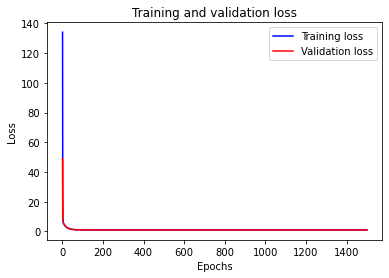

In [46]:
plt.plot( epochs, loss, 'b', label = 'Training loss' )
plt.plot( epochs, val_loss, 'r', label = 'Validation loss' )
plt.title( 'Training and validation loss' )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Loss' )
plt.legend()

plt.show()

- 과적합이 일어나지 않은 것으로 확인

In [47]:
loss, mae, mse = model.evaluate( X_test, y_test, verbose = 2 )

print( "테스트 세트의 평균 절대 오차: {:5.2f} MPG".format( mae ) )

2010/1 - 0s - loss: 0.3236 - mse: 0.5851 - mae: 0.4104
테스트 세트의 평균 절대 오차:  0.59 MPG


In [48]:
pred     # submisson에서 모델에 넣을 변수를 추출한 NumPy 배열

array([[16,  1,  1],
       [16,  1,  2],
       [16,  1,  3],
       ...,
       [19, 17, 39],
       [19, 17, 40],
       [19, 17, 41]], dtype=int64)

In [49]:
prd = model.predict(pred)    # Keras모델로 얻은 예측값
prd 

array([[-0.04909722],
       [-0.03580391],
       [-0.0225106 ],
       ...,
       [-0.00663946],
       [ 0.00665385],
       [ 0.01994716]], dtype=float32)

In [50]:
# 예측값이 정규화 되어있으므로 정규화의 역과정을 통해 실제 예측값을 구한다.
sub1 = pd.DataFrame(prd*d['이용금액'].std() + d['이용금액'].mean())
sub1

,0
0,5.427687e+09
1,5.678318e+09
2,5.928948e+09
3,6.179579e+09
4,6.430210e+09
...,...
1389,5.726920e+09
1390,5.977550e+09
1391,6.228180e+09
1392,6.478811e+09


- 결과값이 차이가 크지 않다
- 이번에는 XGBoost를 이용하여 예측값을 구해보도록 한다.

## XGBoost 사용

In [51]:
modelB = xgboost.XGBRegressor(learning_rate=0.1,
                             max_depth=50,
                              n_estimators=1000) 

In [52]:
modelB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=50,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

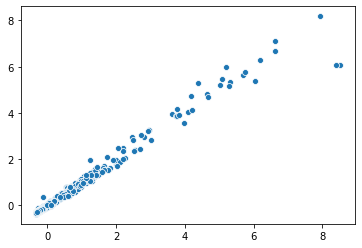

In [53]:
sns.scatterplot(y_test, modelB.predict(X_test))

In [54]:
predictions = [round(value) for value in modelB.predict(X_test)]

In [55]:
print('explained_variance_score: {}'.format(explained_variance_score(y_test, modelB.predict(X_test))))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, modelB.predict(X_test))))
print('r2_score: {}'.format(r2_score(y_test, modelB.predict(X_test))))

explained_variance_score: 0.9841063599007503
mean_squared_errors: 0.009452598445109718
r2_score: 0.9841048065298179


- 평균제곱오차가 매우 낮게 나왔고, 결정계수와 explained_variance_score는 매우 높게 나와 의미있는 결과값임을 알 수 있다.

### 예측값 알아보기

In [56]:
submission

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,0,202004,강원,건강보조식품 소매업,88823904
1,1,202004,강원,골프장 운영업,-2147483648
2,2,202004,강원,과실 및 채소 소매업,1121028224
3,3,202004,강원,관광 민예품 및 선물용품 소매업,14360784
4,4,202004,강원,그외 기타 분류안된 오락관련 서비스업,208554
...,...,...,...,...,...
1389,1389,202007,충북,피자 햄버거 샌드위치 및 유사 음식점업,1343510016
1390,1390,202007,충북,한식 음식점업,-2147483648
1391,1391,202007,충북,호텔업,14121494
1392,1392,202007,충북,화장품 및 방향제 소매업,459964000


In [59]:
submission['업종명'] = submission['STD_CLSS_NM']
submission['연월'] = submission['REG_YYMM']
submission['시도'] = submission['CARD_SIDO_NM']

In [60]:
for i in range(len(submission.STD_CLSS_NM.value_counts().sort_index().index)) :
    submission.업종명 = submission.업종명.replace(submission.STD_CLSS_NM.value_counts().sort_index().index[i],i+1)

In [61]:
for i in range(len(submission.CARD_SIDO_NM.value_counts().sort_index().index)) :
    submission.시도 = submission.시도.replace(submission.CARD_SIDO_NM.value_counts().sort_index().index[i],i+1)

In [62]:
submission.연월 = submission.연월.replace(submission.연월.value_counts().sort_index().index[0],16)
submission.연월 = submission.연월.replace(submission.연월.value_counts().sort_index().index[1],19)

In [63]:
# 모델에 넣을 변수만 추출후 NumPy 배열로 변경
pred = submission[['연월','시도','업종명']]
pred = np.asarray(pred)
pred = np.array(pred)

In [64]:
prd = modelB.predict(pred)  # 예측값 알아보기
prd

array([-0.33242202, -0.17491275, -0.27622747, ..., -0.33608717,
       -0.30523473, -0.3366406 ], dtype=float32)

In [65]:
# 예측값이 정규화된 형태라 정규화 역과정을 통해 실제 예측값으로 변경 후 확인
sub = pd.DataFrame(prd*d['이용금액'].std() + d['이용금액'].mean())
sub

,0
0,8.591360e+07
1,3.055575e+09
2,1.145399e+09
3,1.073613e+07
4,-2.360320e+06
...,...
1389,1.387741e+09
1390,1.892146e+10
1391,1.681101e+07
1392,5.984998e+08


- 모델을 여러개 구해봤지만 예측값에 음수값이 존재하였다.
- 음수는 매출이 없다는 뜻이므로 값을 0으로 바꿔준다.

In [66]:
sub1 = abs(sub)   # 예측값에 절대값을 취해준 값

In [67]:
sub = (sub+sub1)/2 # 예측값과 예측값에 절대값을 취해준 값을 더한 후 2로 나눠 음수값을 0으로 바꿔준다.

In [68]:
sbm=submission[['id','REG_YYMM','CARD_SIDO_NM','STD_CLSS_NM','AMT']] # 제출양식에 필요한 변수만 추출

In [69]:
sbm['AMT'] = sub.loc[:,0]  # 예측값을 'AMT' 변수자리에 넣어준다.
sbm

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,0,202004,강원,건강보조식품 소매업,8.591360e+07
1,1,202004,강원,골프장 운영업,3.055575e+09
2,2,202004,강원,과실 및 채소 소매업,1.145399e+09
3,3,202004,강원,관광 민예품 및 선물용품 소매업,1.073613e+07
4,4,202004,강원,그외 기타 분류안된 오락관련 서비스업,0.000000e+00
...,...,...,...,...,...
1389,1389,202007,충북,피자 햄버거 샌드위치 및 유사 음식점업,1.387741e+09
1390,1390,202007,충북,한식 음식점업,1.892146e+10
1391,1391,202007,충북,호텔업,1.681101e+07
1392,1392,202007,충북,화장품 및 방향제 소매업,5.984998e+08


In [ ]:
sbm.to_csv('submission_final_final.csv',index =False)  # 파일로 저장